# Тестовое задание

## Задача 1. Написать функцию на Python

Напиши функцию, которая удалит дубликаты в списке. 

Список не отсортирован. Необходимо сохранить порядок сортировки оригинального списка.
Примеры:

[1, 2, 3, 1] → [1, 2, 3]

[1, 3, 2, 1, 5, 3, 5, 1, 4] → [1, 3, 2, 5, 4]

Какая асимптотическая сложность у этой функций?

In [1]:
def unic(lst):
    return list(dict.fromkeys(lst))

Асимптотическая  сложность O(N). Можно проверить через скорость выполнения функции

In [2]:
import numpy, random

In [3]:
a, b, s = -10, 10, 10
lst1  = numpy.random.randint(a, b, s).tolist()

In [4]:
a, b, s = -10, 10, 100
lst2  = numpy.random.randint(a, b, s).tolist()

In [5]:
a, b, s = -10, 10, 1000
lst3  = numpy.random.randint(a, b, s).tolist()

In [6]:
%alias_magic t timeit
%t unic(lst1)
%t unic(lst2)
%t unic(lst3)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.
3.17 µs ± 761 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.11 µs ± 419 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
80.8 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Проверим работу функции на заданных примерах (юнит тест)

In [7]:
new_list = unic([1, 2, 3, 1])
print (new_list)

[1, 2, 3]


In [8]:
import unittest
class TestNotebook(unittest.TestCase):
    
    def test_unic(self):
        self.assertEqual(unic([1, 3, 2, 1, 5, 3, 5, 1, 4] ), [1, 3, 2, 5, 4])
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_unic (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## Задача 2. Написать SQL запрос

Дана таблица employees всех сотрудников компании. Поля:
full_name TEXT (PK),
position TEXT,
department TEXT.

Напиши запрос, выводящий все отделы, в которых меньше 5 разработчиков (position = 'Software Developer').


In [ ]:
select department
from   employees 
where position = 'Software Developer'
group  by department
having count(*) < 5;

## Задача 3. Решить задачу         

Подкинули монету N раз. Кол-во случаев, когда выпал орёл, на 10% больше, чем кол-во случаев, когда выпала решка. При каком N мы можем сказать, что монета «нечестная» (орёл и решка выпадают с разной вероятностью)?



## Решение 

Обозначим $n(p)$ и $n(o)$ количество случаев выпадения решки и орла соответсвенно при $N$ числе бросков. За $p(o)$ и $p(р)$  примем вероятности выпадения орла и решки. Тогда 

 $2.1*n(p) = N$
 
 $2.1*p(p) = 1$
 
 $p(p) = 1 / 2.1 = 0.47619$  - вероятность выпадения решки
 
 $p(о) = 0.476*1.1 = 0.5238$ - вероятность выпадения орла.
 
Дисперсия в этом случае 

$σ^2 = N * p(o)*(1 - p(o))$


А отклонение  

$ σ = \sqrt {p(o)*(1-p(o))/N}$

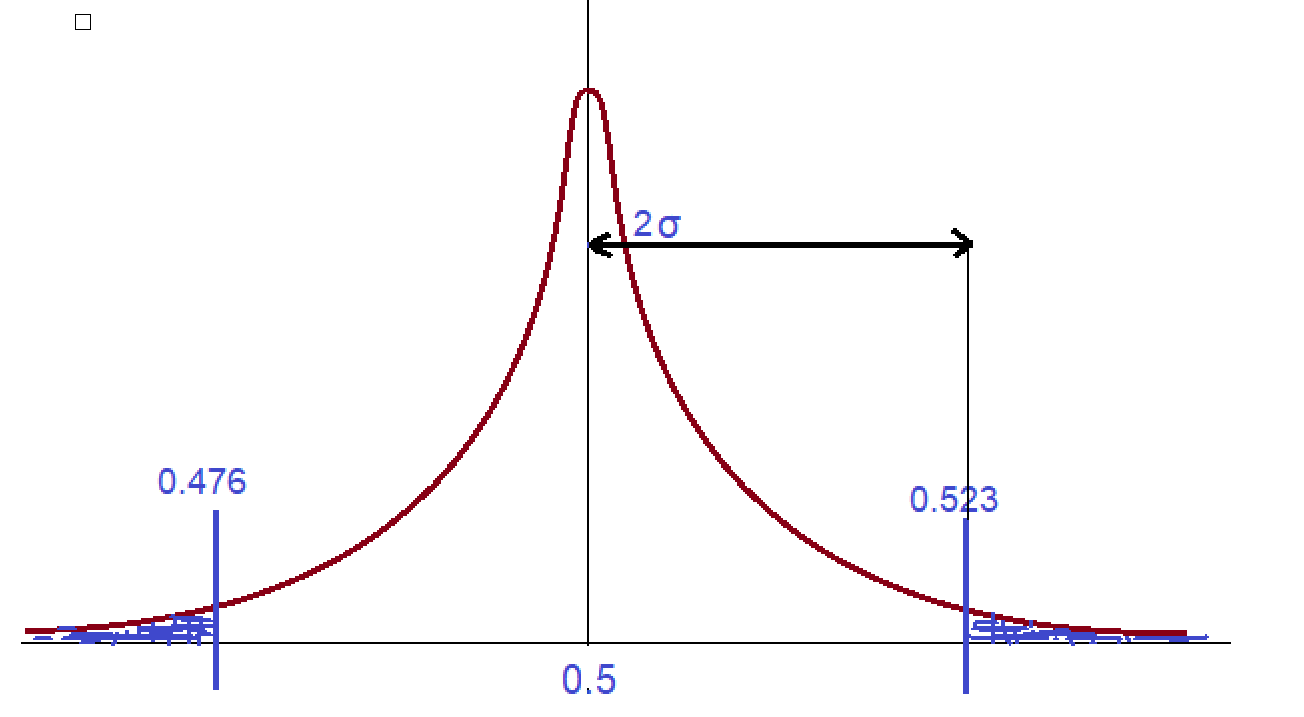

### Вариант 1
Так как для "честной монеты" вероятность выпадения орла и решки равны 0.5, допуская точность в 95 процентов получим

$P(|x-0.5| >= 2σ) = 5$% 

$2* σ = 0.523 - 0.5$ 

$N = p(p)*(1-p(p)/σ^2$ = $0.25 /0.0155^2 = 1041 $ бросков

### Вариант 2
Согласно доверительному критерию Вилсона 
(https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Clopper%E2%80%93Pearson_interval) 

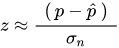 
для $z = 1- α / 2$ квантиль распределения, где $α$  - процент ошибки. Примем стандартно для 95%: $ α  = 100 - 95 = 5$%, тогда $ z=1.96 $

Искомое количество необходимых бросков n можно получить из формул: 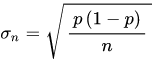

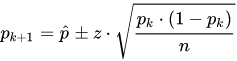

Тогда

$0.023  = 0.96* \sqrt {0.25 / n}$

отсюда $n$ = 512 бросков